Importing library

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Uploding dataset

In [50]:
df = pd.read_csv('ipl2024 Matches.csv') 
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


EDA (Exploratory Data Analysis)

In [51]:
df.shape

(74, 14)

In [52]:
df.dtypes

id                      int64
date                   object
team1                  object
team2                  object
toss_winner            object
decision               object
first_score             int64
first_wkts              int64
second_score            int64
second_wkts             int64
winner                 object
player_of_the_match    object
most_runs              object
most_wkts              object
dtype: object

Dropping irrelevent columns

In [53]:
df = df.drop(columns=['id','date','toss_winner','decision','most_runs','most_wkts','winner'], axis=1)

In [54]:
df.head(5)

,team1,team2,first_score,first_wkts,second_score,second_wkts,player_of_the_match
0,Banglore,Chennai,173,6,176,4,Mustafizur Rahman
1,Delhi,Punjab,174,9,177,6,Sam Curran
2,Kolkata,Hyderabad,208,7,204,7,Andre Russell
3,Rajasthan,Lucknow,193,4,173,6,Sanju Samson
4,Gujarat,Mumbai,168,6,162,9,Sai Sudharsan


Renaming 

In [55]:
df = df.rename(columns={'team1':'TeamA','team2':'TeamB','first_score':'TeamA_score','first_wkts':'TeamA_wkts','second_score':'TeamB_score','second_wkts':'TeamB_wkts'})

In [56]:
df.head(5)

,TeamA,TeamB,TeamA_score,TeamA_wkts,TeamB_score,TeamB_wkts,player_of_the_match
0,Banglore,Chennai,173,6,176,4,Mustafizur Rahman
1,Delhi,Punjab,174,9,177,6,Sam Curran
2,Kolkata,Hyderabad,208,7,204,7,Andre Russell
3,Rajasthan,Lucknow,193,4,173,6,Sanju Samson
4,Gujarat,Mumbai,168,6,162,9,Sai Sudharsan


In [57]:
drop_duplicate = df[df.duplicated()]
drop_duplicate

,TeamA,TeamB,TeamA_score,TeamA_wkts,TeamB_score,TeamB_wkts,player_of_the_match


In [58]:
df.count()

TeamA                  74
TeamB                  74
TeamA_score            74
TeamA_wkts             74
TeamB_score            74
TeamB_wkts             74
player_of_the_match    71
dtype: int64

In [59]:
df = df.drop_duplicates()
df.count()

TeamA                  74
TeamB                  74
TeamA_score            74
TeamA_wkts             74
TeamB_score            74
TeamB_wkts             74
player_of_the_match    71
dtype: int64

Cleaning/Removing/Dropping null values

In [60]:
df.isnull().sum()

TeamA                  0
TeamB                  0
TeamA_score            0
TeamA_wkts             0
TeamB_score            0
TeamB_wkts             0
player_of_the_match    3
dtype: int64

In [61]:
df.dropna() 
df.count()

TeamA                  74
TeamB                  74
TeamA_score            74
TeamA_wkts             74
TeamB_score            74
TeamB_wkts             74
player_of_the_match    71
dtype: int64

Checkink Outliers

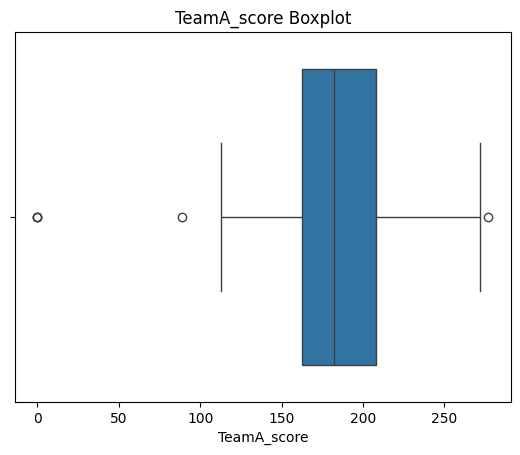

In [62]:
sns.boxplot(x='TeamA_score', data=df) 
plt.title("TeamA_score Boxplot") 
plt.show()

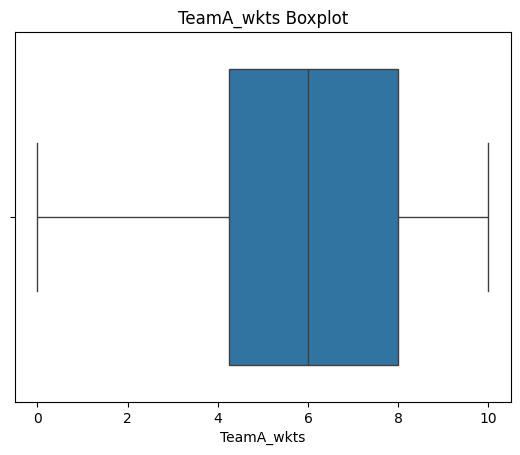

In [63]:
sns.boxplot(x='TeamA_wkts', data=df) 
plt.title("TeamA_wkts Boxplot") 
plt.show()

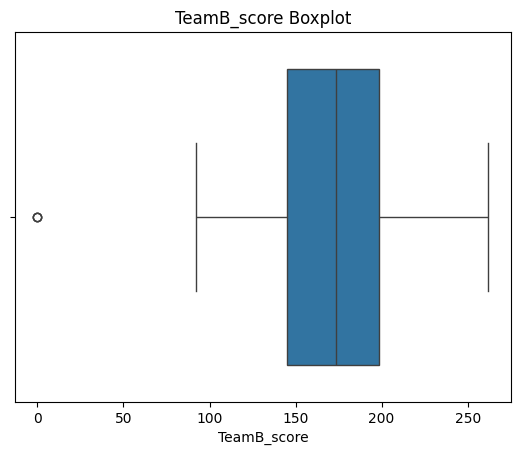

In [64]:
sns.boxplot(x='TeamB_score', data=df) 
plt.title("TeamB_score Boxplot") 
plt.show()

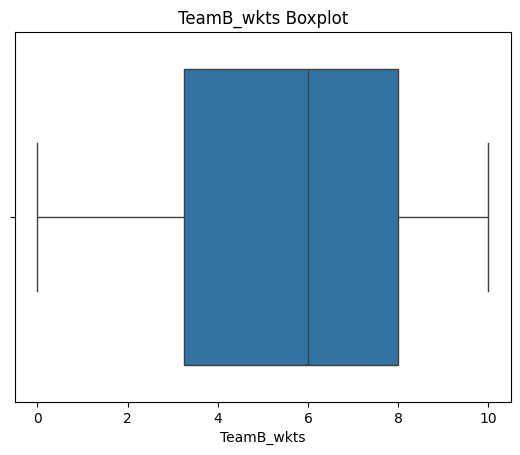

In [65]:
sns.boxplot(x='TeamB_wkts', data=df) 
plt.title("TeamB_wkts Boxplot") 
plt.show()

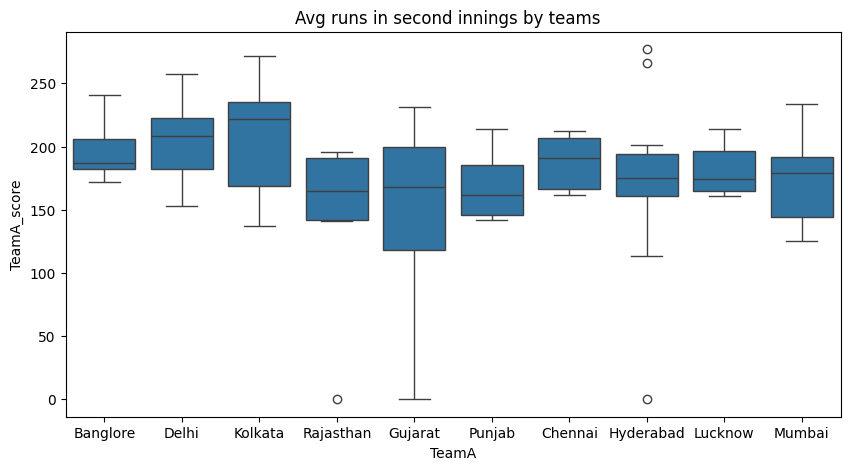

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='TeamA',y='TeamA_score',data=df)
plt.title('Avg runs in second innings by teams  ')
plt.show()

Removing the Outliars

In [67]:
q1 = df.select_dtypes(np.number).quantile(0.25) 
q3 = df.select_dtypes(np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)

TeamA_score    45.75
TeamA_wkts      3.75
TeamB_score    53.00
TeamB_wkts      4.75
dtype: float64


In [68]:
df = df[~((df.select_dtypes(np.number) < (q1 - 1.5 * iqr)) | (df.select_dtypes(np.number) > (q3 + 1.5 * iqr))).any(axis=1)]

In [69]:
q1 = df.select_dtypes( include= np.number).quantile(0.25)
q3 = df.select_dtypes( include= np.number).quantile(0.75)
iqr = q3 - q1
print(iqr)

TeamA_score    43.0
TeamA_wkts      3.0
TeamB_score    47.0
TeamB_wkts      4.0
dtype: float64


Visualization 

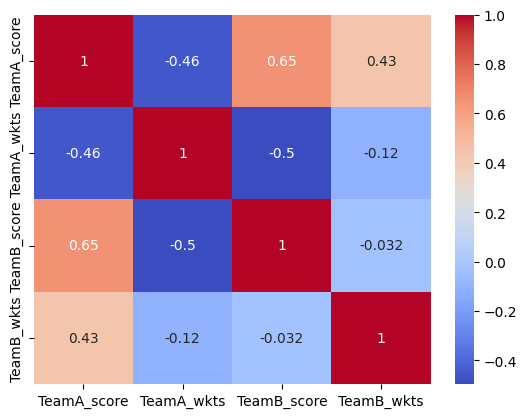

In [70]:
corr = df.corr(numeric_only=True)
sns.heatmap( corr,annot=True , cmap='coolwarm')
plt.show()

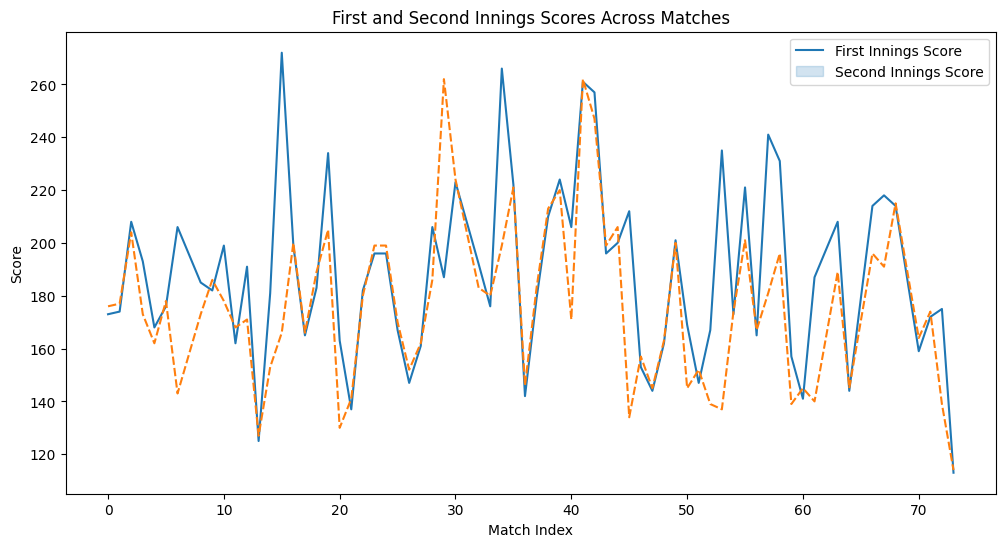

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[['TeamA_score', 'TeamB_score']])
plt.title('First and Second Innings Scores Across Matches')
plt.xlabel('Match Index')
plt.ylabel('Score')
plt.legend(['First Innings Score', 'Second Innings Score'])
plt.show()

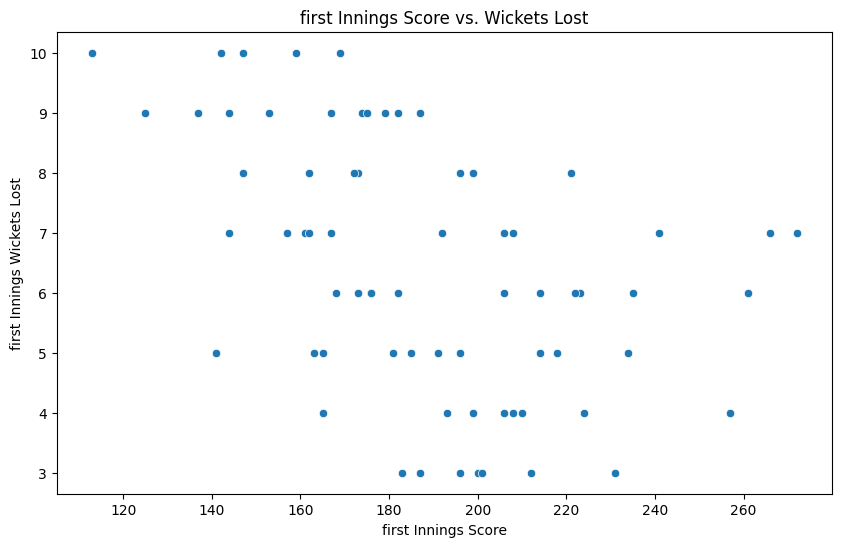

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TeamA_score', y='TeamA_wkts', data=df)
plt.title('first Innings Score vs. Wickets Lost')
plt.xlabel('first Innings Score')
plt.ylabel('first Innings Wickets Lost')
plt.show()

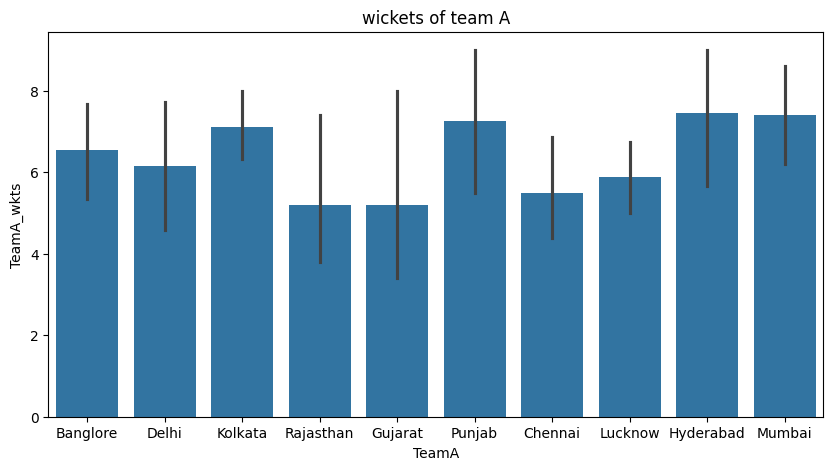

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(x='TeamA',y ='TeamA_wkts',data=df)
plt.title('wickets of team A')
plt.show()

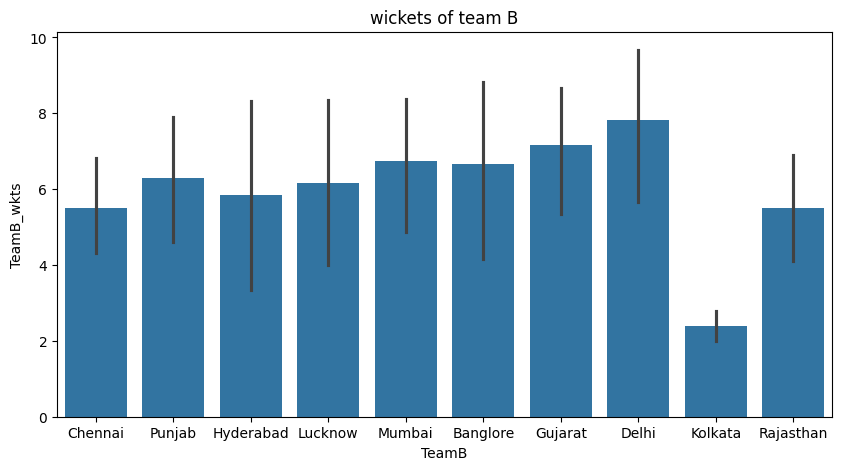

In [74]:
plt.figure(figsize=(10, 5))
sns.barplot(x='TeamB',y ='TeamB_wkts',data=df)
plt.title('wickets of team B')
plt.show()

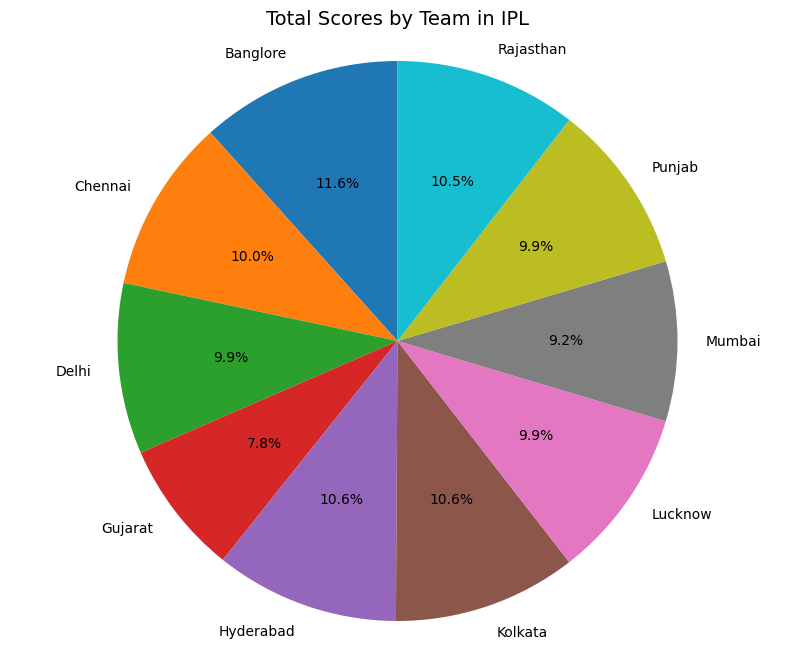

In [75]:
teamA_scores = df.groupby('TeamA')['TeamA_score'].sum()
teamB_scores = df.groupby('TeamB')['TeamB_score'].sum()

total_scores = teamA_scores.add(teamB_scores, fill_value=0)

plt.figure(figsize=(10, 8))
plt.pie(total_scores, labels=total_scores.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Scores by Team in IPL', fontsize=14)
plt.axis('equal')  
plt.show()

PCA(Principal Component Analysis)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LinearRegression, LogisticRegression
from sklearn.metrics  import accuracy_score , confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Preprocessing

In [77]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [78]:
X = df[['TeamA_wkts', 'TeamB_wkts', 'TeamA_score', 'TeamB_score']]
y = df['TeamA']

In [79]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
print(x_scaled)


[[-0.19376351 -0.75592631 -0.46008803 -0.01327946]
 [ 1.23870242 -0.02643099 -0.43008228  0.01944493]
 [ 0.28372513  0.33831667  0.5901129   0.90300352]
 [-1.14874079 -0.02643099  0.14002679 -0.11145264]
 [-0.19376351  1.06781198 -0.61011673 -0.47142096]
 [-0.19376351 -0.02643099 -0.3700708   0.05216932]
 [-0.19376351  0.70306433  0.53010142 -1.09318441]
 [-0.67125215 -0.39117865 -0.10001914 -0.11145264]
 [-0.19376351 -1.12067396 -0.19003636  0.31396446]
 [ 0.76121378 -0.39117865  0.32006123  0.05216932]
 [ 0.76121378 -1.12067396 -0.79015117 -0.2750746 ]
 [-0.67125215 -0.02643099  0.08001531 -0.17690142]
 [ 1.23870242 -0.75592631 -1.90036358 -1.61677469]
 [-0.67125215  1.43255964 -0.2200421  -0.76594049]
 [ 0.28372513  1.43255964  2.51048031 -0.34052339]
 [-1.14874079  0.33831667  0.32006123  0.77210595]
 [-0.67125215 -0.75592631 -0.70013395 -0.34052339]
 [-1.62622943 -0.75592631 -0.16003062  0.41213764]
 [-0.67125215  0.70306433  1.37026216  0.93572791]
 [-0.67125215  1.43255964 -0.76

Applying PCA

In [80]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(x_scaled)
X_pca

array([[-3.89088689e-01, -7.77872531e-01],
       [-8.83145392e-01,  1.79350358e-01],
       [ 8.04154196e-01,  1.03698609e-01],
       [ 5.96297914e-01, -2.18674358e-01],
       [-2.52984947e-01,  9.66408446e-01],
       [-1.05913275e-01, -1.52912621e-01],
       [ 2.40247954e-03,  1.09493403e+00],
       [ 1.13069687e-01, -4.68282873e-01],
       [-1.39952201e-01, -1.17857451e+00],
       [-2.63218738e-01, -1.30379058e-01],
       [-1.31257674e+00, -8.29150619e-01],
       [ 2.82729292e-01, -9.32050449e-02],
       [-2.87462339e+00, -6.15922493e-02],
       [ 1.59049229e-01,  1.35932614e+00],
       [ 1.57599959e+00,  1.88617582e+00],
       [ 1.28992807e+00, -2.21053652e-01],
       [-4.75170463e-01, -7.99487323e-01],
       [ 7.51226825e-01, -1.22445696e+00],
       [ 1.87541909e+00,  3.24588988e-01],
       [-5.85616613e-01,  1.56448635e+00],
       [-2.49836460e+00, -4.98656892e-01],
       [-6.82673546e-01,  1.82170776e-01],
       [ 1.45787534e+00, -3.33642994e-01],
       [-1.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2 , random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55, 2)
(14, 2)
(55,)
(14,)


In [83]:
X_train

array([[-3.76196347e+00, -4.80575224e-01],
       [ 4.20474778e-01,  1.24623078e+00],
       [-1.20662652e+00,  1.00046209e+00],
       [-1.16379273e+00, -1.46080452e+00],
       [ 2.13968849e+00,  2.06221035e-01],
       [-1.16205076e+00, -8.73976519e-01],
       [-4.75170463e-01, -7.99487323e-01],
       [-2.17309504e+00,  8.42918416e-01],
       [ 1.08091794e+00, -2.30969262e+00],
       [ 2.43160470e+00, -1.20073722e+00],
       [ 1.13069687e-01, -4.68282873e-01],
       [-2.10591929e+00,  1.21205346e-01],
       [ 3.39175371e+00,  1.06037414e-01],
       [-1.40942846e+00,  1.59025167e+00],
       [-1.52809333e+00,  2.19041440e-01],
       [-5.85616613e-01,  1.56448635e+00],
       [ 1.28023036e+00,  1.52870201e+00],
       [ 2.58151396e+00, -2.07197441e+00],
       [-1.49153840e+00,  5.71181727e-01],
       [ 2.67439356e-01,  8.40397379e-01],
       [ 1.59049229e-01,  1.35932614e+00],
       [-2.06936435e+00,  4.73345633e-01],
       [ 5.96297914e-01, -2.18674358e-01],
       [ 7.

In [84]:
X_test

array([[ 1.45787534, -0.33364299],
       [-0.38908869, -0.77787253],
       [ 1.56736079, -0.32049144],
       [-0.25298495,  0.96640845],
       [ 0.84286463,  0.63833116],
       [ 1.87541909,  0.32458899],
       [-1.31257674, -0.82915062],
       [ 1.89642759,  0.79873098],
       [-1.91674141, -0.62317368],
       [-2.87462339, -0.06159225],
       [-0.45415541, -1.44952624],
       [-0.26321874, -0.13037906],
       [-0.92959601,  1.9995507 ],
       [-0.10591327, -0.15291262]])

In [85]:
y_train

73    4
32    7
59    5
37    7
58    3
48    1
17    1
36    8
44    3
29    4
8     9
64    9
42    2
52    1
47    7
20    6
57    0
41    5
26    8
40    0
14    6
51    3
3     9
18    0
9     0
56    6
6     1
38    1
67    0
72    4
16    3
28    1
43    6
27    6
50    5
25    6
60    9
66    6
12    2
34    4
70    4
71    0
39    2
30    5
45    1
68    8
1     2
54    4
22    4
2     5
24    0
21    5
63    2
15    5
53    5
Name: TeamA, dtype: int64

In [86]:
y_test

23    9
0     0
49    4
4     3
55    2
19    7
11    4
35    5
46    2
13    7
33    1
10    6
61    0
5     8
Name: TeamA, dtype: int64

In [89]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 6, 0, 5, 5, 2, 4, 5, 4, 4, 6, 6, 5, 6])

In [90]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.21428571428571427